In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolSegmentationCellpose
from scportrait.pipeline.selection import LMDSelection

In [2]:
project_location = "project"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example4.yml",
    overwrite=True,
    debug=True,
    segmentation_f=CytosolSegmentationCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[20/03/2025 14:25:07] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/config.yml
[20/03/2025 14:25:07] Compression algorithm for extracted single-cell images: lzf
[20/03/2025 14:25:07] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4.
[20/03/2025 14:25:07] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4.


In [3]:
from scportrait.data._datasets import dataset_4

dataset_4_path = dataset_4()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_4_path}/Ch1.tif", f"{dataset_4_path}/Ch2.tif", f"{dataset_4_path }/Ch3.tif"]

project.load_input_from_tif_files(images, channel_names = ['Channel1', 'Channel2', 'Channel3'])

[20/03/2025 14:25:07] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/scportrait
         .sdata                                                                                                    


[20/03/2025 14:25:07] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/Project_44m5q5as for Project
[20/03/2025 14:25:08] Image input_image written to sdata object.
[20/03/2025 14:25:08] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/Project_44m5q5as'>


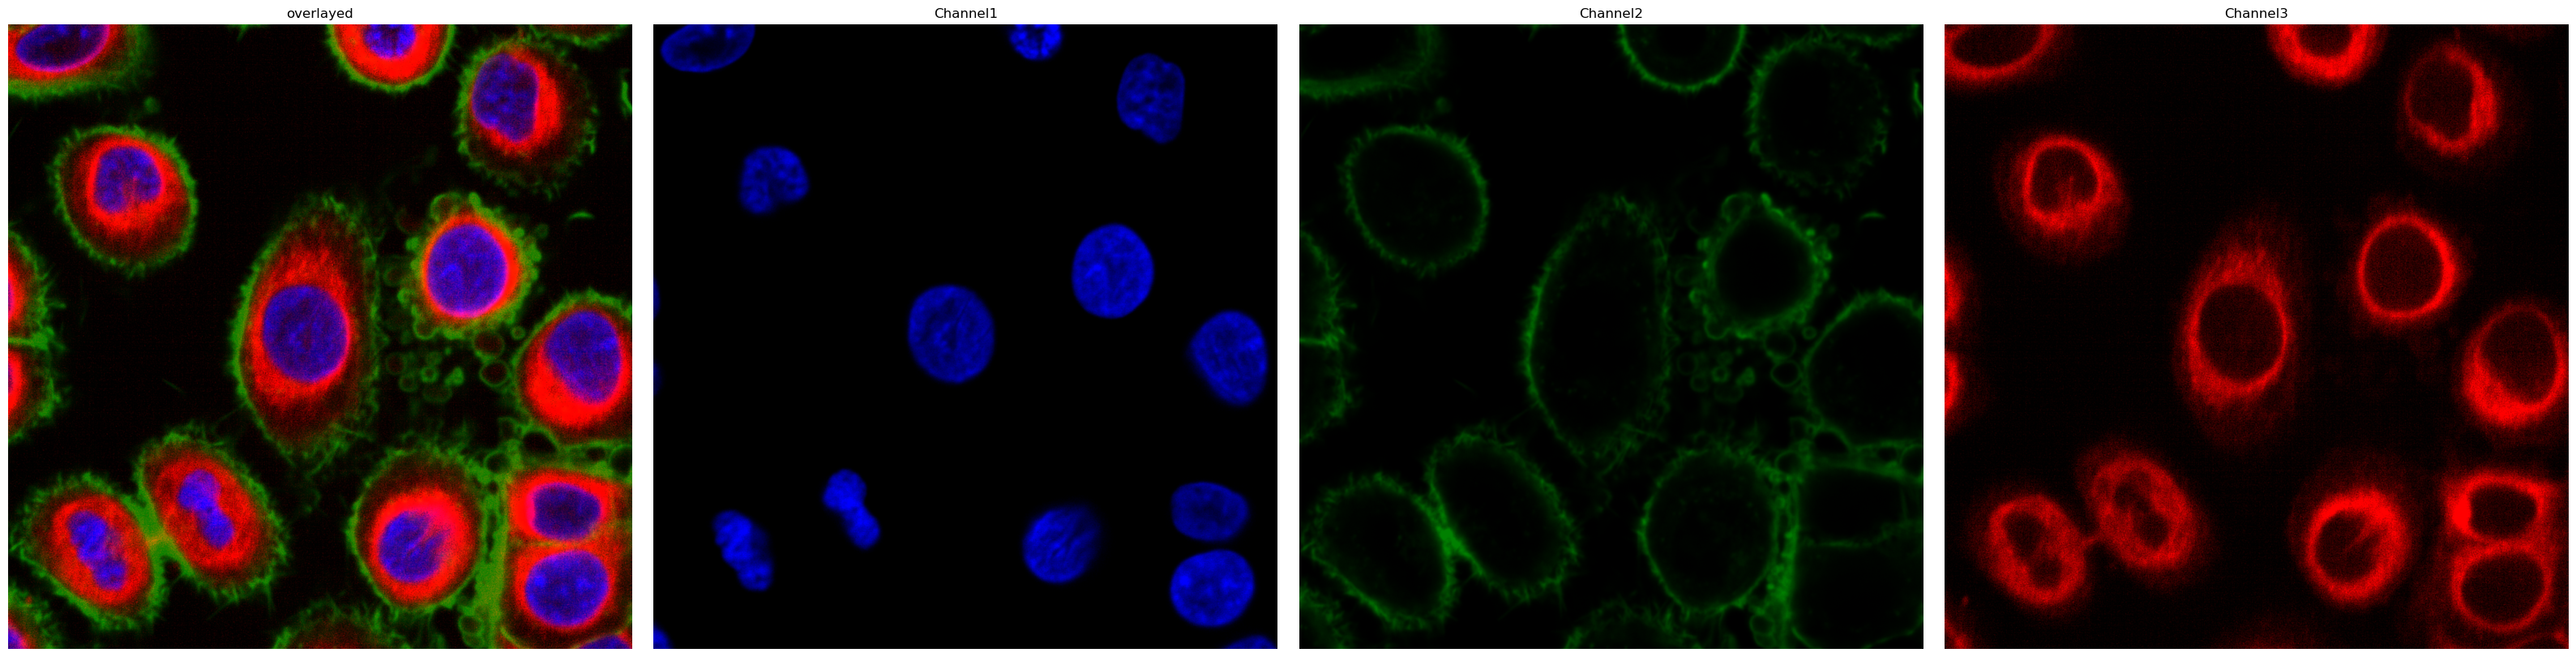

In [4]:
project.plot_input_image()

[20/03/2025 14:25:18] GPU Status for segmentation is True and will segment using the following device mps.
[20/03/2025 14:25:19] Segmenting nucleus using the following model: nuclei


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[20/03/2025 14:25:25] Segmenting cytosol using the following model: cyto2


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[20/03/2025 14:25:40] Performing filtering to match Cytosol and Nucleus IDs.
[20/03/2025 14:25:41] Removed 15 nuclei and 6 cytosols due to filtering.
[20/03/2025 14:25:41] After filtering, 41 matching nuclei and cytosol masks remain.
[20/03/2025 14:25:43] Total time to perform nucleus and cytosol mask matching filtering: 2.93 seconds
[20/03/2025 14:25:43] Segmentation seg_all_nucleus written to sdata object.
[20/03/2025 14:25:45] Points centers_seg_all_nucleus written to sdata object.
[20/03/2025 14:25:45] Segmentation seg_all_cytosol written to sdata object.
[20/03/2025 14:25:45] Points centers_seg_all_cytosol written to sdata object.


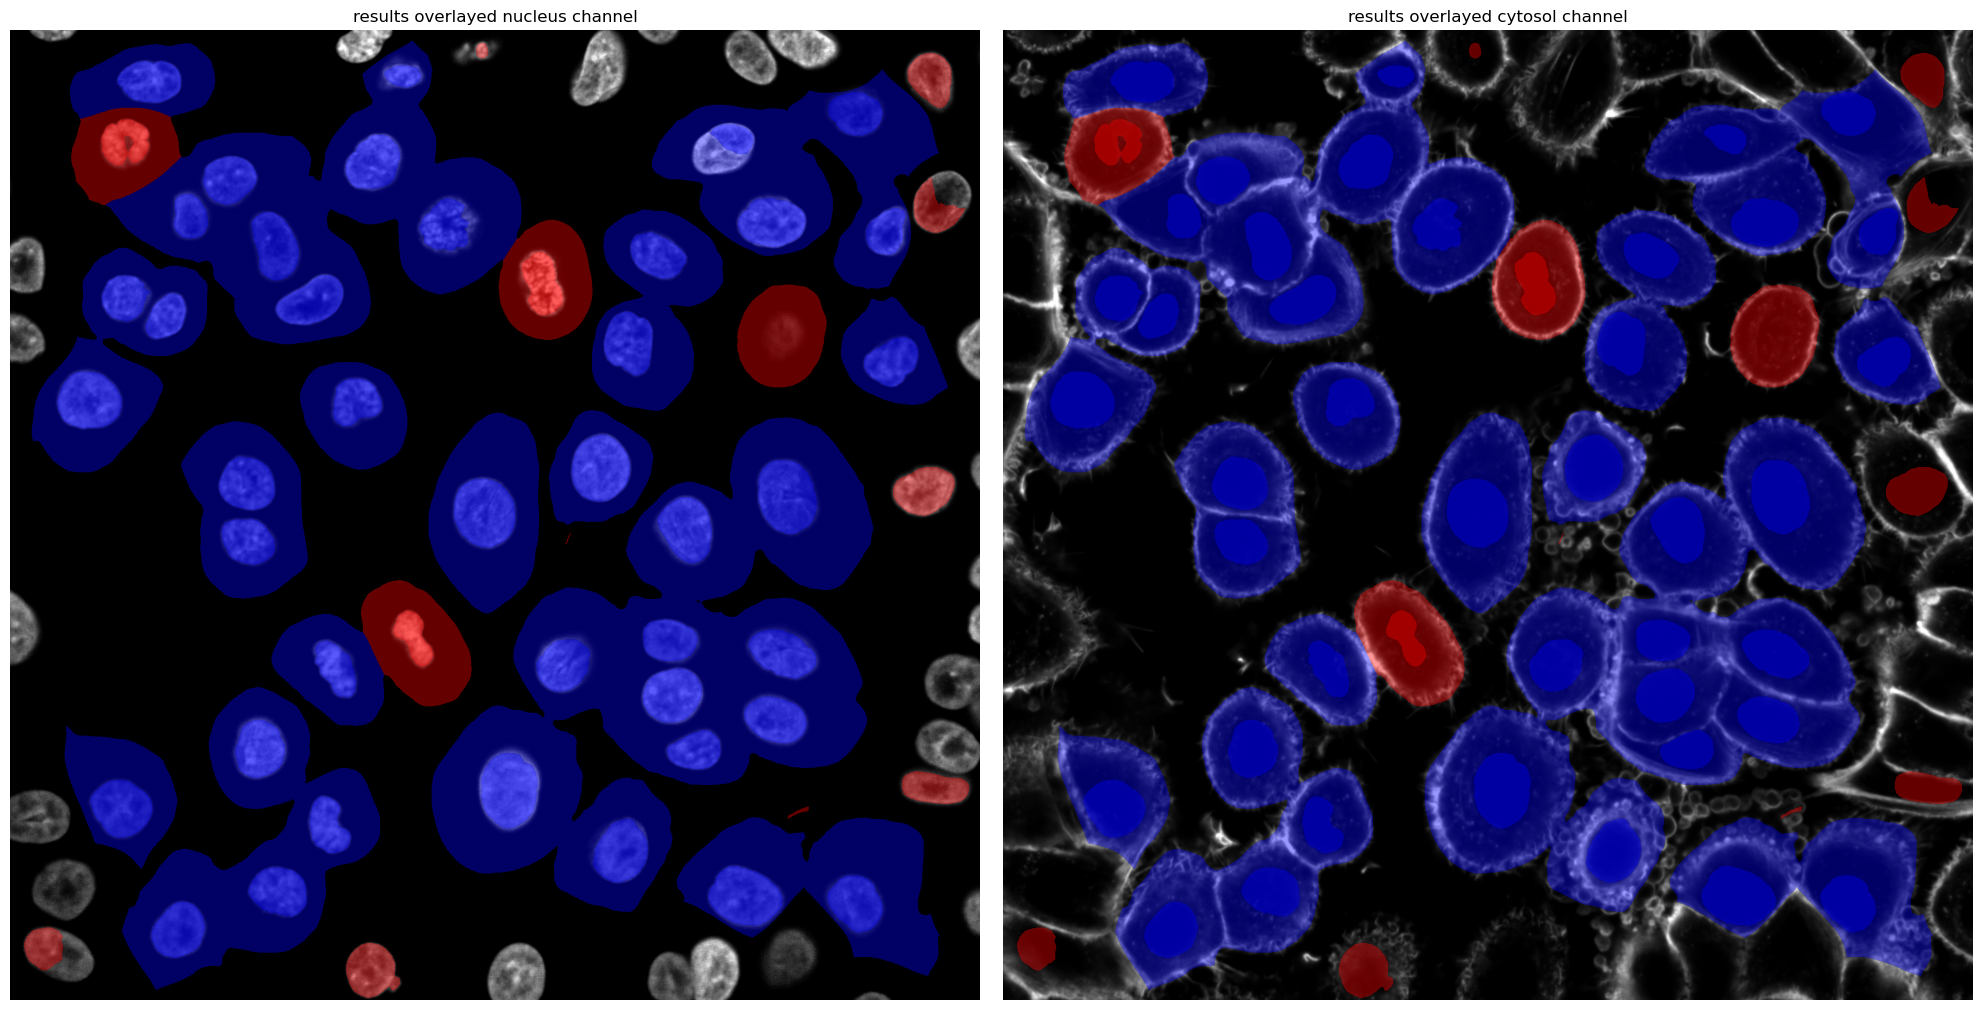

In [5]:
project.segment()

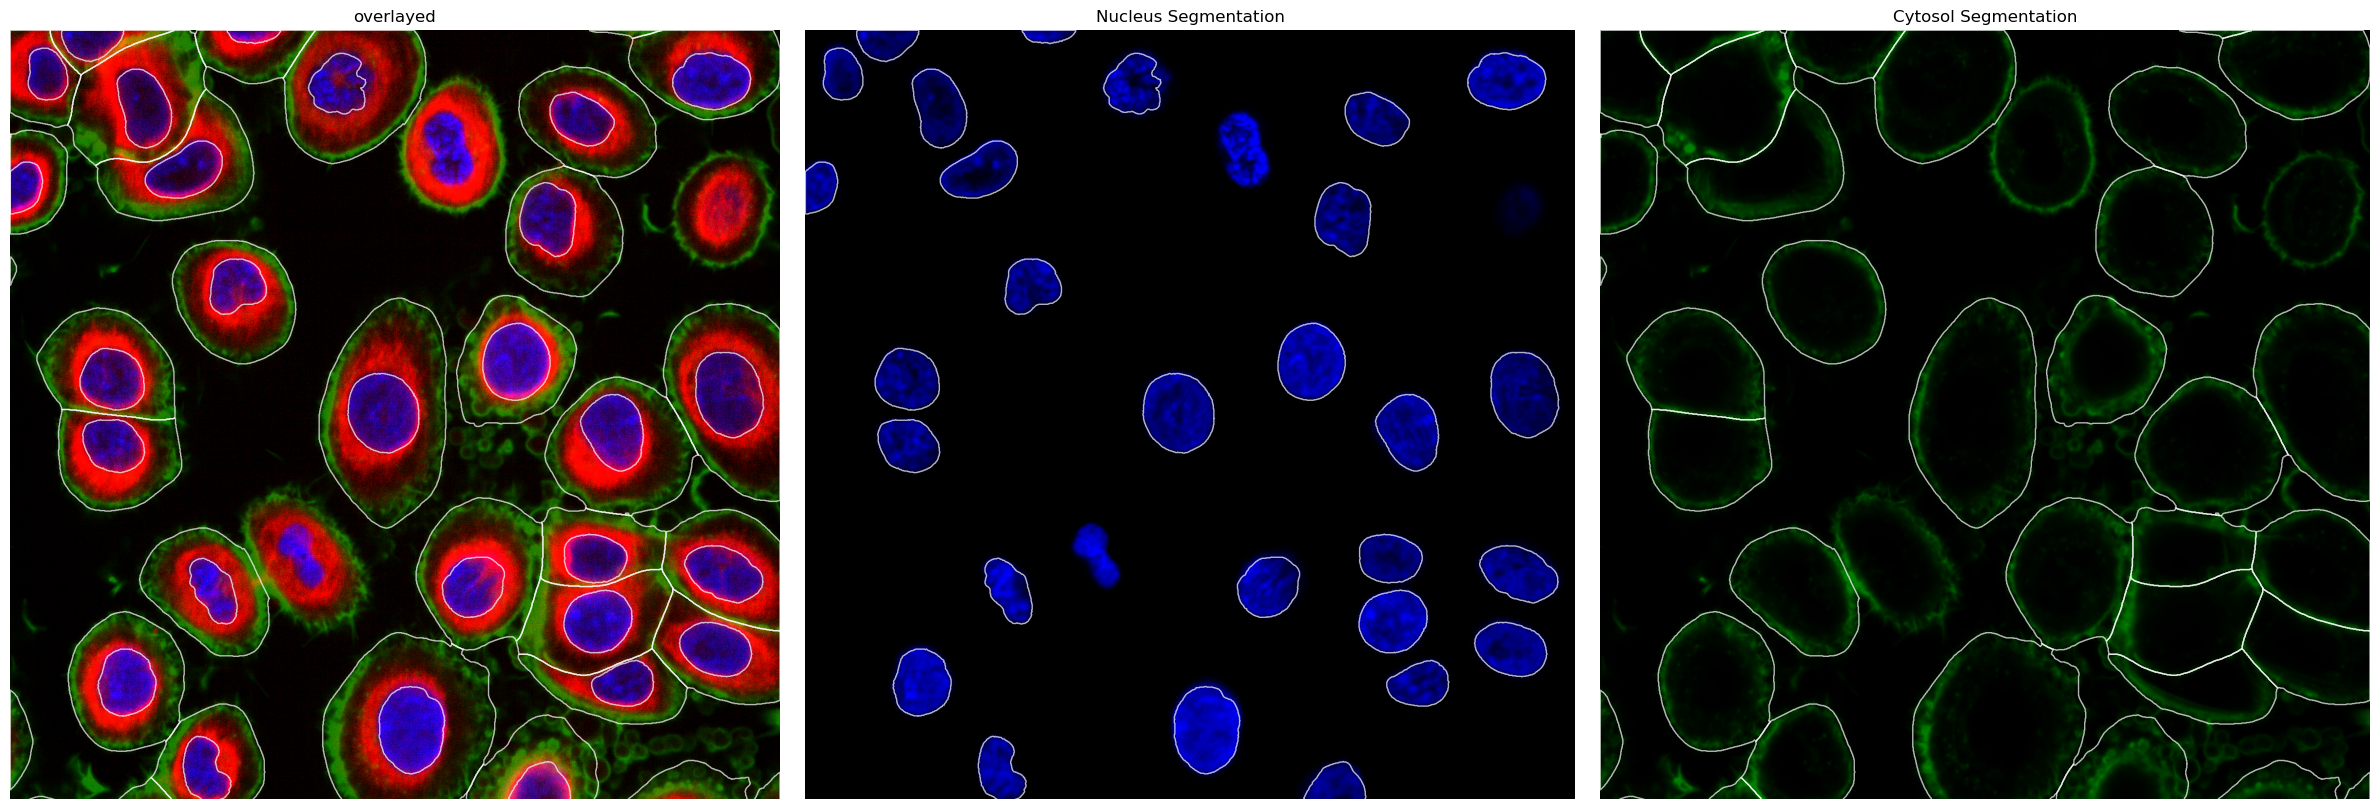

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

[20/03/2025 14:25:50] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_a87pctxd for HDF5CellExtraction
[20/03/2025 14:25:50] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/extraction/data
[20/03/2025 14:25:50] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/extraction/data
[20/03/2025 14:25:50] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[20/03/2025 14:25:50] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[20/03/2025 14:25:50] A total of 6 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/p

Extracting cell batches:   0%|          | 0/1 [00:00<?, ?it/s]

[20/03/2025 14:25:51] Finished extraction in 0.73 seconds (48.23 cells / second)
[20/03/2025 14:25:51] Benchmarking times saved to file.
[20/03/2025 14:25:51] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_a87pctxd'>


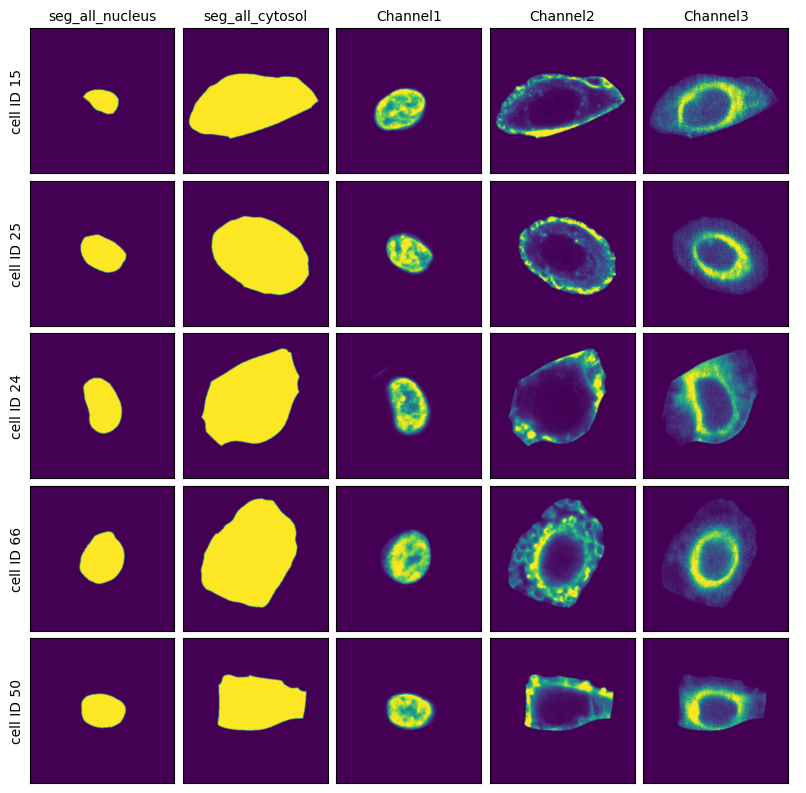

In [8]:
project.plot_single_cell_images()

In [9]:
project.featurize(overwrite = True)

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/extraction/data/single_cells.h5sc
[20/03/2025 14:25:52] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/CellFeaturizer_5wr3k279 for CellFeaturizer
[20/03/2025 14:25:52] Started CellFeaturization of all available channels.
[20/03/2025 14:25:52] Overwrite flag is set, deleting existing directory for featurization results.
[20/03/2025 14:25:52] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/project/featurization/complete_CellFeaturizer
[20/03/2025 14:25:52] Automatically configured inference device to mps
[20/03/2025 14:25:52] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_4/CellFeaturizer_q_cjg8bj for CellFeaturizer
[20/03/2025 14:

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

nucleus_area  cytosol_area  cytosol_only_area  Channel1_mean_nucleus  \
0         5808.0       47580.0            41772.0               0.060168   
1        13325.0       56716.0            43391.0               0.059105   
2        11733.0       37531.0            25798.0               0.052573   
3         7681.0       36103.0            28422.0               0.034812   
4        14920.0       53144.0            38224.0               0.067154   
5        11528.0       67705.0            56177.0               0.053333   
6         8532.0       29924.0            21392.0               0.036203   
7        13991.0       55082.0            41091.0               0.059873   
8        11124.0       46629.0            35505.0               0.047743   
9        13395.0       47968.0            34573.0               0.050341   
10        9854.0       29518.0            19664.0               0.044350   
11        8182.0       27797.0            19615.0               0.037082   
12       13974.0       48736.0            34762.0               0.057741   
13       10642.0       48310.0            37668.0               0.045979   
14       17487.0       47697.0            30210.0               0.080141   
15       13652.0       48210.0            34558.0               0.057414   
16       19602.0       91886.0            72284.0               0.083057   
17       19169.0       85260.0            66091.0               0.085640   
18       15414.0       61821.0            46407.0               0.070982   
19       11397.0       41617.0            30220.0               0.047560   
20       10926.0       33142.0            22216.0               0.050539   
21       13886.0       53557.0            39671.0               0.063559   
22       12681.0       59566.0            46885.0               0.055943   
23        9520.0       47454.0            37934.0               0.038103   
24       14563.0       47196.0            32633.0               0.067966   
25       13139.0       48345.0            35206.0               0.060837   
26       13241.0       52101.0            38860.0               0.063087   
27        9568.0       31045.0            21477.0               0.041982   
28       19196.0      101541.0            82345.0               0.098603   
29       15410.0       55002.0            39592.0               0.064490   
30        9978.0       38626.0            28648.0               0.043011   
31       15091.0       59852.0            44761.0               0.066644   
32       18688.0       55745.0            37057.0               0.082734   
33       13008.0       49159.0            36151.0               0.052713   
34       13528.0       77382.0            63854.0               0.061352   

    Channel1_median_nucleus  Channel1_quant75_nucleus  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   
6                       0.0                       0.0   
7                       0.0                       0.0   
8                       0.0                       0.0   
9                       0.0                       0.0   
10                      0.0                       0.0   
11                      0.0                       0.0   
12                      0.0                       0.0   
13                      0.0                       0.0   
14                      0.0                       0.0   
15                      0.0                       0.0   
16                      0.0                       0.0   
17                      0.0                       0.0   
18                      0.0                       0.0   
19                      0.0                       0.0   
20                      0.0                       0.0   
21           

Text(0.5, 0, 'cytosol area')

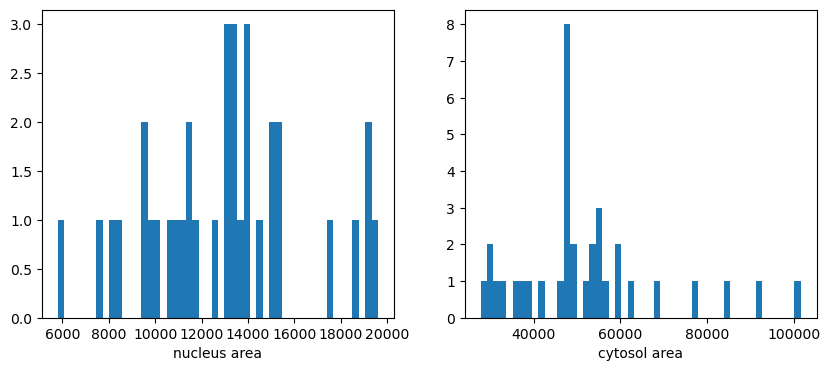

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(results["nucleus_area"], bins=50)
axs[0].set_xlabel("nucleus area")

axs[1].hist(results["cytosol_area"], bins=50)
axs[1].set_xlabel("cytosol area")